<a href="https://colab.research.google.com/github/ShresthaPriya/AI-and-ML/blob/main/workshop5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
import numpy as np
from PIL import Image
import tensorflow as tf

# Task 1: Data Understanding and Visualization:

1. Load and visualize data

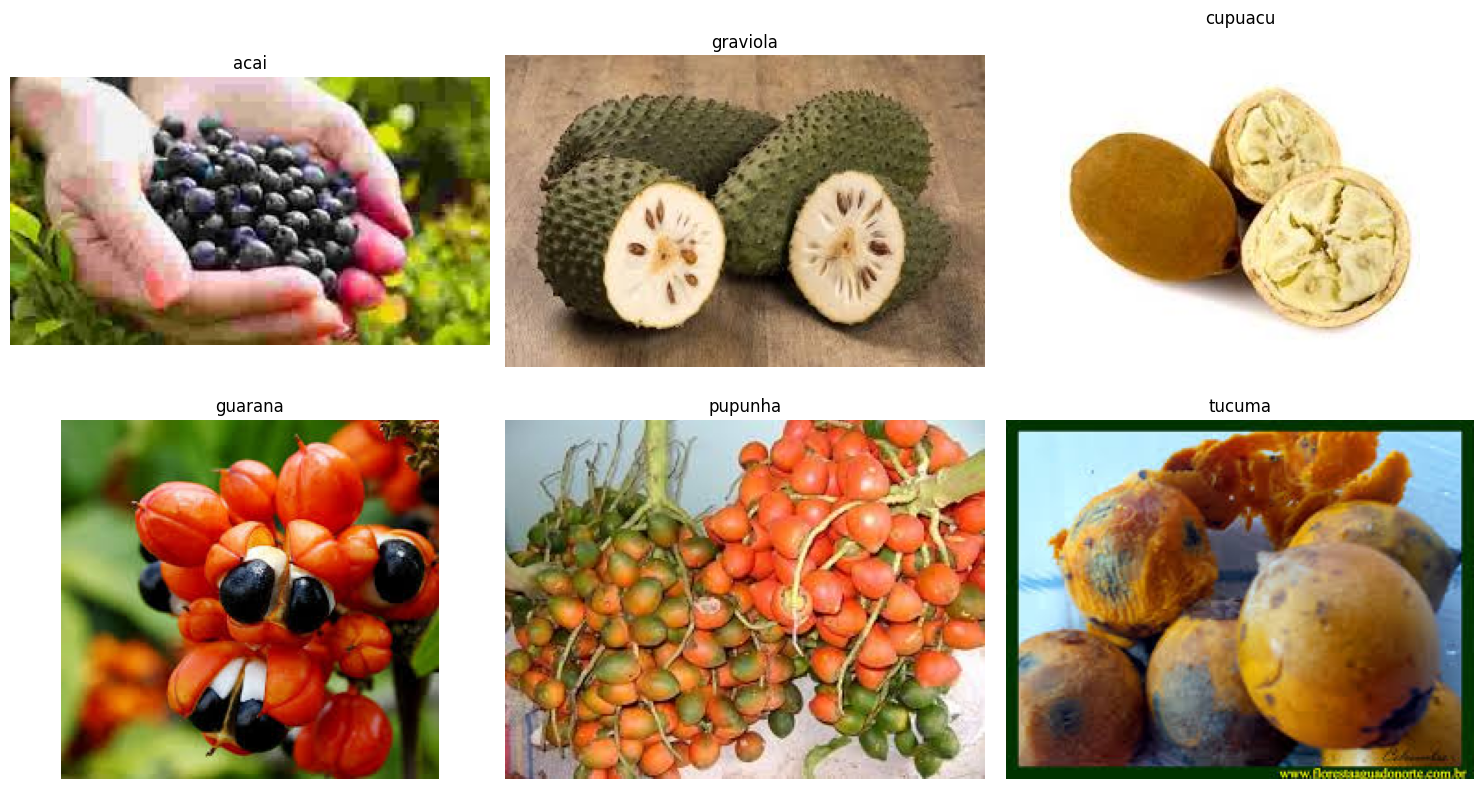

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the training dataset
train_dir = "/content/drive/MyDrive/AI ML/Workshop5/FruitinAmazon/FruitinAmazon/train"

# Get the list of class directories
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
labels = []
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    images = os.listdir(class_path)
    if images:
        random_image = random.choice(images)
        selected_images.append(os.path.join(class_path, random_image))
        labels.append(class_name)

# Display images in a grid format with two rows
num_images = len(selected_images)
cols = (num_images + 1) // 2  # Ensuring two rows
fig, axes = plt.subplots(2, cols, figsize=(15, 8))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide extra subplots if not needed

plt.tight_layout()
plt.show()


• What did you Observe?

Upon visualizing the images, I noticed that each class has a unique representation, indicating a well-organized dataset. Size of images differs, lighting of images are different, some has border on the edges.

2. Check for Corrupted Image:

In [5]:
import os


# Get the list of class directories
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# List to store corrupted image paths
corrupted_images = []

# Iterate through each class directory
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if the image can be opened
        except (IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove the corrupted image
            print(f"Removed corrupted image: {image_path}")

# Final report
if not corrupted_images:
    print("No corrupted images found.")


No corrupted images found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [6]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=True,
  validation_split=validation_split,
  subset="training",
  seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=False,
  validation_split=validation_split,
  subset="validation",
  seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement a CNN with

1. Convolutional Architecture:

Fully Connected Network Architecture:

In [7]:
import numpy as np

# If using tf.data.Dataset
unique_labels = set()
for _, labels in train_ds:
    unique_labels.update(np.unique(labels.numpy()))
print("Unique labels:", unique_labels)
print("Number of classes:", len(unique_labels))

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
Number of classes: 6


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to create the CNN model
def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        # Convolutional Layer 1
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Convolutional Layer 2
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Flatten layer
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),

        # Output Layer (Softmax for multi-class classification)
        layers.Dense(num_classes, activation="softmax")
    ])

    return model

# Define parameters
input_shape = (128, 128, 3)  # Example input shape (128x128 RGB images)
num_classes = 6  # Adjust based on dataset

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model

In [9]:
# Compile the model
model.compile(
    optimizer="adam",  # Adam optimizer for adaptive learning rate
    loss="sparse_categorical_crossentropy",  # Suitable for multi-class classification with integer labels
    metrics=["accuracy"]  # Track accuracy during training
)


# Task 4: Train the Model
Model Training

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True  # Restore model to best state
)

model_checkpoint = ModelCheckpoint(
    "best_model.h5",  # Save the best model to this file
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode="max",  # Maximize validation accuracy
    verbose=1
)
callbacks = [model_checkpoint, early_stopping]

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,  # Train for 250 epochs
    batch_size=16,  # Set batch size to 16
    callbacks=[early_stopping, model_checkpoint]  # Use callbacks to avoid overfitting
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.2066 - loss: 2.1951
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 892ms/step - accuracy: 0.1966 - loss: 2.2443 - val_accuracy: 0.3333 - val_loss: 1.6499
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.2407 - loss: 1.7874
Epoch 2: val_accuracy improved from 0.33333 to 0.72222, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.2361 - loss: 1.7846 - val_accuracy: 0.7222 - val_loss: 1.7127
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.4005 - loss: 1.7368
Epoch 3: val_accuracy did not improve from 0.72222
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 0.3976 - loss: 1.7357 - val_accuracy: 0.0000e+00 - val_loss: 1.9441
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.2002 - loss: 1.7001
Epoch 4: val_accuracy did not improve from 0.72222
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 0.1988 - loss: 1.6966 - val_accuracy: 0.0000e+00 - val_loss: 2.0294
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.2743 - loss: 1.5911
Epoch 5: val_accuracy did not improve from 0.72222
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.2786 - loss: 1.5867 - val_accuracy: 0.5556 - val_loss: 1.6360
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.6863 - loss: 1.3760
Epoch 6: val_accuracy did not improve f

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - accuracy: 0.7027 - loss: 0.9918 - val_accuracy: 0.8889 - val_loss: 0.6846
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8507 - loss: 0.7365
Epoch 9: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.8464 - loss: 0.7323 - val_accuracy: 0.8333 - val_loss: 0.7551
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.9201 - loss: 0.4441
Epoch 10: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.9193 - loss: 0.4436 - val_accuracy: 0.8889 - val_loss: 0.4289
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.9248 - loss: 0.3243
Epoch 11: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - accuracy: 0.9262 - loss: 0.3213 - val_accuracy: 0.5556 - val_loss: 1.0014
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.8686 - loss: 0.4533
Epoch 12: val_accuracy improved from 0.888

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 824ms/step - accuracy: 0.8772 - loss: 0.4336 - val_accuracy: 0.9444 - val_loss: 0.2939
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9497 - loss: 0.1687
Epoch 13: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step - accuracy: 0.9518 - loss: 0.1646 - val_accuracy: 0.6667 - val_loss: 0.9992
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9398 - loss: 0.1962
Epoch 14: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.9410 - loss: 0.1929 - val_accuracy: 0.8333 - val_loss: 0.2718
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 1.0000 - loss: 0.0539
Epoch 15: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 1.0000 - loss: 0.0550 - val_accuracy: 0.9444 - val_loss: 0.2448
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 1.0000 - loss: 0.0412
Epoch 16: val_accuracy did not improve f

# Task 5: Evaluate the Model
Model Evaluation


In [12]:
# Assuming test_ds is your test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/AI ML/Workshop5/FruitinAmazon/FruitinAmazon/test",  # Replace with the actual test directory path
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),  # Same image size as training
    batch_size=16,  # Same batch size as training
    shuffle=False  # No shuffling for evaluation
)

test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


Found 30 files belonging to 6 classes.
2/2 - 5s - 3s/step - accuracy: 0.7667 - loss: 146.6638
Test accuracy: 0.7667


In [13]:
model.save('fruit_fully_connected_model.h5')

In [14]:
loaded_model = tf.keras.models.load_model('fruit_fully_connected_model.h5')

In [15]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_ds, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7611 - loss: 145.2978
Test Accuracy: 0.7667


# Task 7: Predictions and Classification Report
Making Predictions

In [16]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test dataset
y_pred_probabilities = loaded_model.predict(test_ds)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Get true labels from the test dataset (ground truth)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred_labels, target_names=classes)

# Print the classification report
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
              precision    recall  f1-score   support

        acai       1.00      0.60      0.75         5
    graviola       0.45      1.00      0.62         5
     cupuacu       0.75      0.60      0.67         5
     guarana       1.00      1.00      1.00         5
     pupunha       1.00      1.00      1.00         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.77        30
   macro avg       0.87      0.77      0.77        30
weighted avg       0.87      0.77      0.77        30

